In [1]:
import pandas as pd
import numpy as np

DATA_DIR = r'C:/Vidit/PhD/Fall 2018/CMSC 643 - Hector/Project 2/Part 1_HC/data'
CSV_FILE = DATA_DIR + '/KaggleV2-May-2016.csv'

# read data using read_csv function
noshow_df = pd.read_csv(CSV_FILE, 
                        dtype={ 'Age': np.float64
                              },
                       parse_dates = ['ScheduledDay', 'AppointmentDay'])
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [3]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df

clean_noshow_df = noshow_df.copy()
clean_noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# rename some variables
clean_noshow_df = clean_noshow_df.rename(index=str, 
                     columns = {"Hipertension": "Hypertension",
                      "Handcap": "Handicap"})

# remove negative ages
clean_noshow_df = clean_noshow_df.drop(clean_noshow_df[clean_noshow_df['Age'] < 0].index)

# take another look
clean_noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921800e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# save as csv file
PROCESSED_DATA_DIR = r'C:/Vidit/PhD/Fall 2018/CMSC 643 - Hector/Project 2/Part 1_HC/processed_dir'
clean_noshow_df.to_csv(PROCESSED_DATA_DIR + '/clean_noshow_df.csv', index=False)

In [8]:
PROCESSED_DATA_DIR = r'C:/Vidit/PhD/Fall 2018/CMSC 643 - Hector/Project 2/Part 1_HC/processed_dir'
clean_noshow_df = pd.read_csv(PROCESSED_DATA_DIR + "/clean_noshow_df.csv",
                           parse_dates=['AppointmentDay', 'ScheduledDay'])
# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

# check class proportions in complete dataset
clean_noshow_df['No-show'].value_counts() / len(clean_noshow_df)

No     0.798066
Yes    0.201934
Name: No-show, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=1234)

for train_index, test_index in split.split(clean_noshow_df, clean_noshow_df['No-show']):
    train_set = clean_noshow_df.iloc[train_index]
    test_set = clean_noshow_df.iloc[test_index]

In [10]:
# check class proportions on train and test sets to make sure 
# properly stratified

print("Train set:")
print(train_set['No-show'].value_counts() / len(train_set))

print("Test set:")
print(test_set['No-show'].value_counts() / len(test_set))

Train set:
No     0.798069
Yes    0.201931
Name: No-show, dtype: float64
Test set:
No     0.79805
Yes    0.20195
Name: No-show, dtype: float64


In [11]:
# save train and test sets as csvs
train_set.to_csv(PROCESSED_DATA_DIR + '/train_set.csv', index=False)
test_set.to_csv(PROCESSED_DATA_DIR + '/test_set.csv', index=False)

In [12]:
# copy data frame to only use train set
clean_noshow_df = train_set.copy()
clean_noshow_df.shape

(90526, 14)

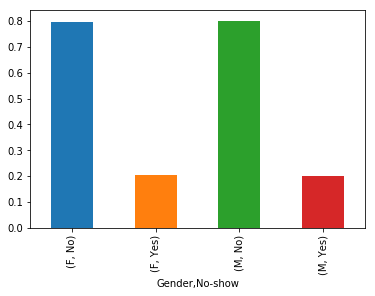

In [13]:
%matplotlib inline

# is there a difference in the no show rate based on gender
clean_noshow_df.groupby('Gender')['No-show'].value_counts(normalize=True).plot.bar()

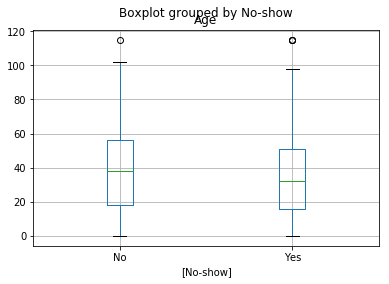

In [14]:
# is there a difference in the age distribution
# between classes
clean_noshow_df[['Age','No-show']].boxplot(by='No-show')

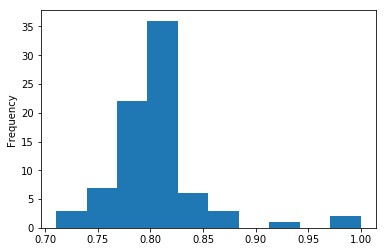

In [15]:
# does the no show rate differ across neightborhoods?

# make a histogram of proportion of appointments
# where people show up across neighborhoods
clean_noshow_df.groupby('Neighbourhood')['No-show']\
             .value_counts(normalize=True)\
             .loc[:,'No']\
             .plot.hist()

In [16]:
# how about the other variables
columns = ['No-show', 'Scholarship', 'Hypertension', 'Diabetes',
           'Alcoholism', 'Handicap', 'SMS_received']
clean_noshow_df[columns].groupby('No-show').mean()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
No-show,,,,,,
No,0.094095,0.205672,0.074232,0.030784,0.022520,0.290923
Yes,0.116193,0.168381,0.063567,0.029814,0.020678,0.436816


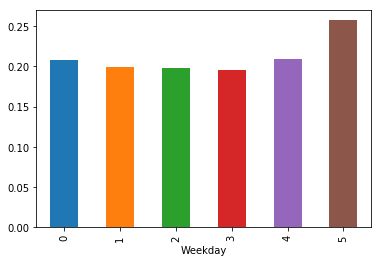

In [17]:

# does the day of the week matter?
clean_noshow_df['Weekday'] = clean_noshow_df['AppointmentDay'].dt.weekday
clean_noshow_df.groupby('Weekday')['No-show']\
    .value_counts(normalize=True)\
    .loc[:,'Yes']\
    .plot.bar()

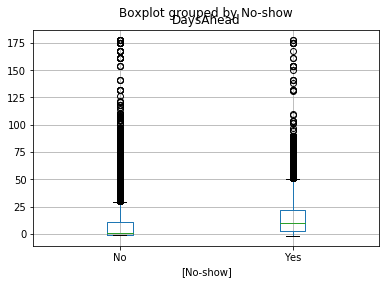

In [18]:
clean_noshow_df['DaysAhead'] = (clean_noshow_df['AppointmentDay'] - clean_noshow_df['ScheduledDay'])\
    .dt.days

clean_noshow_df[['DaysAhead','No-show']].boxplot(by='No-show')

In [19]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler

# github.com/pandas-dev/sklearn-pandas
# install with pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

class WeekdayTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X['AppointmentDay'].dt.weekday.values

weekday_mapper = DataFrameMapper([
    (['AppointmentDay'], WeekdayTransform())
], input_df=True)
    

weekday_pipeline = Pipeline([
    ('weekday_adder', weekday_mapper),
    ('weekday_encoder', OneHotEncoder(n_values=7))
])


class DaysAheadTransform(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        daysahead = (X['AppointmentDay'] - X['ScheduledDay'])\
            .dt.days\
            .values\
            .astype('float64')
        return daysahead
    
daysahead_mapper = DataFrameMapper([
    (['AppointmentDay', 'ScheduledDay'], DaysAheadTransform())
], input_df=True)

daysahead_pipeline = Pipeline([
    ('mapper', daysahead_mapper),
    ('scaler', StandardScaler())
])

date_pipeline = FeatureUnion(transformer_list=[
    ('weekday_pipeline', weekday_pipeline),
    ('daysahead_pipeline', daysahead_pipeline)
])

numeric_attributes = ['Scholarship',
                      'Hypertension',
                      'Diabetes',
                      'Alcoholism',
                      'SMS_received'
                     ]

num_mapper = DataFrameMapper(list(zip(numeric_attributes, [None for x in numeric_attributes])))

df_mapper = DataFrameMapper([
    (['Age'], StandardScaler()),
    ('Gender', LabelBinarizer()),
    ('Neighbourhood', LabelBinarizer()),
    (['Handicap'], OneHotEncoder())
])


full_pipeline = FeatureUnion(transformer_list=[
    ('date_pipeline', date_pipeline),
    ('num_mapper', num_mapper),
    ('df_mapper', df_mapper)
])

In [20]:
clean_df = pd.read_csv(PROCESSED_DATA_DIR + "/train_set.csv", parse_dates=['ScheduledDay','AppointmentDay'],
                      dtype={'Age': np.float64})
clean_df_labels = clean_df['No-show'].copy()
clean_df = clean_df.drop('No-show', axis=1)
clean_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,14885636456919,5546731,F,2016-04-05 17:14:48,2016-05-16,7.0,JARDIM CAMBURI,0,0,0,0,0,0
1,9129977224611,5625339,F,2016-04-27 07:08:52,2016-05-02,66.0,REDENÇÃO,0,1,0,0,0,1
2,81886343468464,5763694,F,2016-06-02 09:17:53,2016-06-03,70.0,JARDIM DA PENHA,0,1,1,0,0,0
3,83662492819854,5639495,F,2016-04-29 09:09:55,2016-04-29,25.0,SÃO BENEDITO,1,0,0,0,0,0
4,45358657799995,5623265,F,2016-04-26 13:46:56,2016-05-06,9.0,SÃO PEDRO,0,0,0,0,0,1


In [25]:
# how to run a piece of the pipeline for testing
# weekday_pipeline.fit_transform(clean_df)[:10,:].toarray()
full_pipeline.fit(clean_df)
noshow_mat = full_pipeline.transform(clean_df)

In [26]:
noshow_mat.shape

(90526, 101)

In [27]:
noshow_mat[:5,:].toarray()

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.01796982,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.30311271,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 